### Импорт библиотек

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

### Загрузка данных

In [9]:
data = pd.read_parquet('train.parquet', engine = 'pyarrow')
data_set = data.copy()

pd.options.display.max_columns = None
display(data_set.head(5))

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
0,32.910908,17.376350,77.557840,2.929855,gas1,20.487150,57.633085,49.245392,-44.124381,23.400064,-28.640648,-10.995420,40.856313,29.912800,33.168114,18.769718,41.812507,14.203652,9.689942,17.951627,24.198589,102.448710,110.529868,56.817260,12.887802,27.050891,6.502743
1,41.263782,22.419445,47.945514,-25.847472,gas2,21.461239,3.474080,49.659980,-13.553188,-13.047593,-12.445940,16.657368,42.453280,99.792375,127.159321,-13.180244,50.722470,-14.451904,-0.906120,105.724742,-9.435222,-16.060150,37.286110,61.224272,39.822424,84.127890,76.578716
2,25.580283,17.376350,77.654180,2.799411,gas1,20.487150,28.938295,49.245392,-44.124381,20.610679,-28.641150,-1.886830,40.927941,16.340674,60.760647,18.658501,52.731646,14.395054,9.779019,17.951638,24.999453,101.728213,111.471534,52.664304,12.887802,22.080133,3.036043
3,33.756900,17.376350,73.049625,2.953982,gas1,20.487150,28.932311,49.245392,-44.124381,18.107963,-28.642094,16.284415,40.869406,43.707663,48.037510,18.771030,52.305692,14.184314,9.798969,17.951675,23.990300,101.312113,115.589451,56.840719,12.887802,30.234082,8.910795
4,4.223732,38.772534,48.015553,-25.843943,gas2,24.635721,12.011581,51.030938,84.244199,-17.735680,40.395582,16.557978,65.988300,91.081310,150.949700,-13.172169,51.012294,-14.439953,8.262354,90.187207,-2.901661,-16.060150,37.398779,40.488468,128.295838,71.128092,50.475082


### Первичный анализ

In [10]:
data_set.describe()

,feature0,feature1,feature2,feature3,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
count,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000,153417.000000
mean,16.302428,24.148455,64.568498,-8.541291,22.899275,26.380063,50.149063,-9.911472,-4.479259,-7.108036,14.969318,48.133644,52.408817,92.909836,5.316045,67.713329,2.235538,8.435346,50.161139,9.959142,51.150637,81.019988,47.829513,43.377533,46.191063,22.133926
std,16.000144,10.111806,16.013548,17.308887,7.773277,15.680547,2.568093,51.276526,20.524631,29.368990,24.104070,11.161902,31.808669,42.497361,16.099902,23.611826,14.662267,5.838787,38.396021,22.080002,58.377682,37.758819,8.845647,45.697364,27.072734,21.617111
min,-7.940096,17.376350,47.924084,-25.848546,20.487150,-19.233715,49.245392,-44.124381,-46.961253,-28.818586,-10.995420,35.180187,5.526539,32.724019,-13.182710,28.937227,-14.455593,-3.691173,17.920767,-23.105101,-16.060150,37.251959,35.189332,12.887802,8.209056,0.705184
25%,2.561470,17.376350,47.998219,-25.844819,20.487150,14.871859,49.245392,-44.124381,-22.915014,-28.641280,-1.806274,40.870013,23.557682,59.358529,-13.174159,51.038167,-14.442813,5.992582,17.951766,-9.881029,-16.060150,37.371570,40.421329,12.887802,22.659438,3.738661
50%,16.677377,17.376350,66.891750,2.715953,20.487150,26.219566,49.245392,-44.124381,1.446003,-28.640245,7.447846,40.902962,43.225691,85.031387,18.662175,63.479034,14.098373,9.765337,17.951946,16.379374,100.827267,92.965293,48.214599,12.887802,29.264585,7.321744
75%,26.466572,30.557408,77.411806,2.880851,23.048478,37.625099,50.347151,11.335929,13.445561,14.217279,25.497981,54.249079,85.795745,128.860745,18.849206,84.268564,14.267678,9.836455,93.354343,24.991204,101.523486,116.248331,52.662560,62.314584,75.405310,43.570636
max,113.431367,156.508683,112.974420,143.098288,180.757188,68.935366,102.445952,111.188391,31.286513,69.616133,100.093896,127.055939,102.653702,166.631497,57.948330,161.556774,66.504344,108.176225,106.976426,49.702414,137.844053,125.075755,100.289302,151.295656,95.184692,81.840792


In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153417 entries, 0 to 153416
Data columns (total 27 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   feature0   153417 non-null  float64
 1   feature1   153417 non-null  float64
 2   feature2   153417 non-null  float64
 3   feature3   153417 non-null  float64
 4   feature4   153417 non-null  object 
 5   feature5   153417 non-null  float64
 6   feature6   153417 non-null  float64
 7   feature7   153417 non-null  float64
 8   feature8   153417 non-null  float64
 9   feature9   153417 non-null  float64
 10  feature10  153417 non-null  float64
 11  feature11  153417 non-null  float64
 12  feature12  153417 non-null  float64
 13  feature13  153417 non-null  float64
 14  feature14  153417 non-null  float64
 15  feature15  153417 non-null  float64
 16  feature16  153417 non-null  float64
 17  feature17  153417 non-null  float64
 18  feature18  153417 non-null  float64
 19  feature19  153417 non-n

In [12]:
print(data_set['feature4'].unique())

['gas1' 'gas2']


In [13]:
data_set['feature4'] = data_set['feature4'].apply(lambda x: 1 if x == 'gas1' else 2)
data_set['feature4'] = data_set['feature4'].astype('int64')

<Axes: >

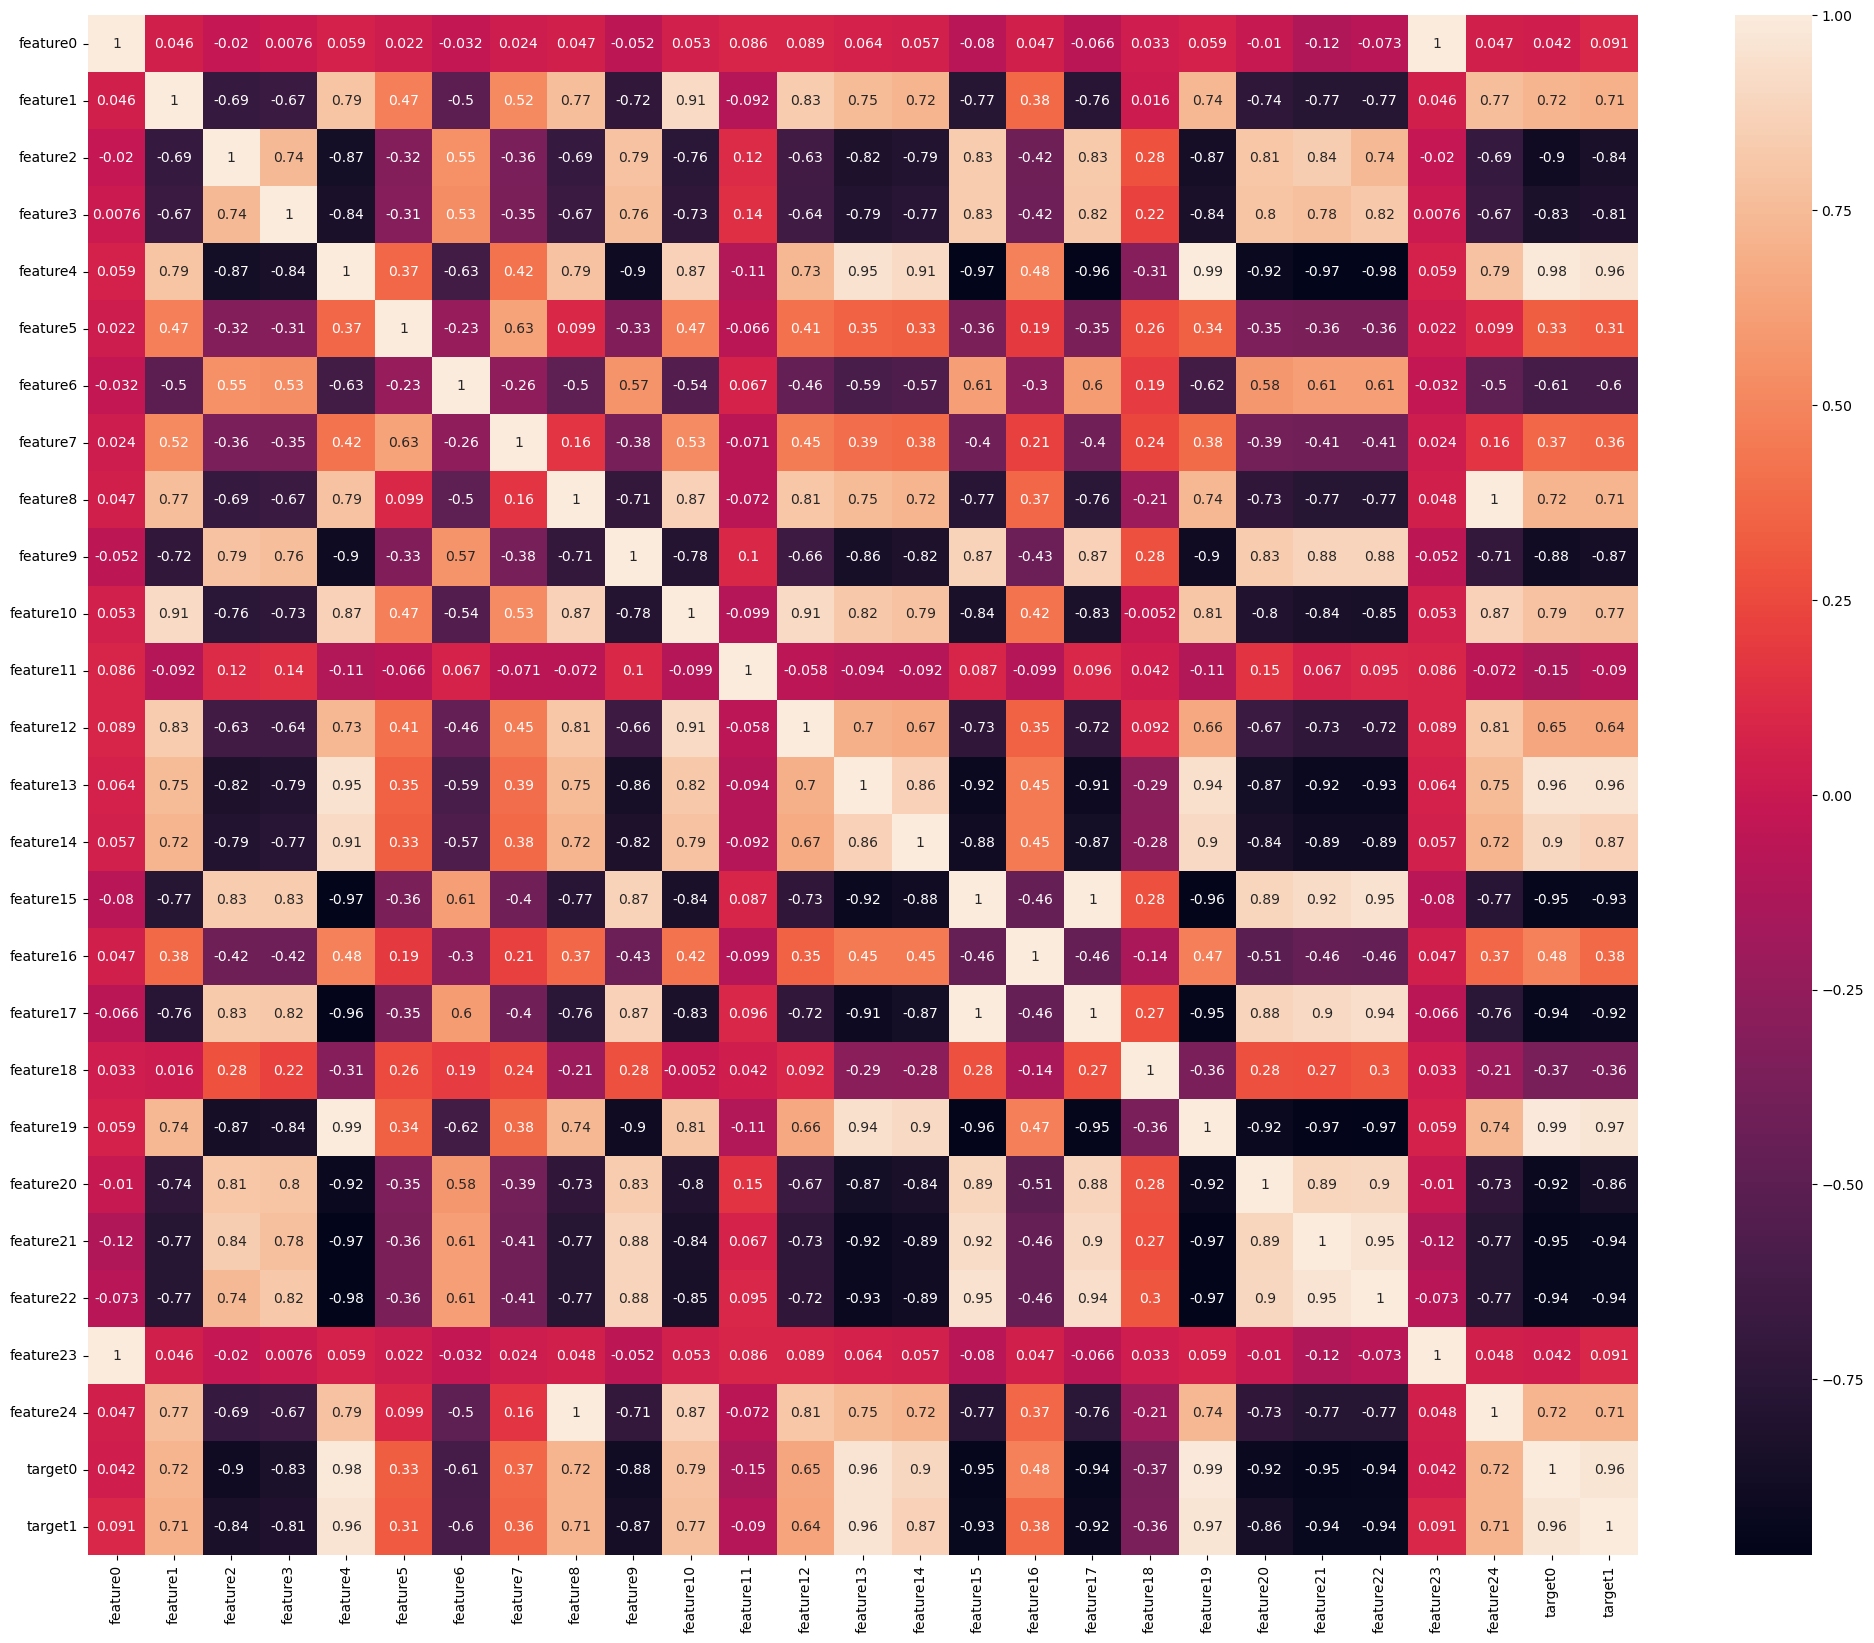

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25, 20))

sns.heatmap(data_set.corr(), annot = True)

In [15]:
#sns.pairplot(data_set)

### Фракция Gas1

In [16]:
data_gas1 = data_set[data_set['feature4'] == 1]

display(data_gas1.head(10))

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
0,32.910908,17.37635,77.557840,2.929855,1,20.48715,57.633085,49.245392,-44.124381,23.400064,-28.640648,-10.995420,40.856313,29.912800,33.168114,18.769718,41.812507,14.203652,9.689942,17.951627,24.198589,102.448710,110.529868,56.817260,12.887802,27.050891,6.502743
2,25.580283,17.37635,77.654180,2.799411,1,20.48715,28.938295,49.245392,-44.124381,20.610679,-28.641150,-1.886830,40.927941,16.340674,60.760647,18.658501,52.731646,14.395054,9.779019,17.951638,24.999453,101.728213,111.471534,52.664304,12.887802,22.080133,3.036043
3,33.756900,17.37635,73.049625,2.953982,1,20.48715,28.932311,49.245392,-44.124381,18.107963,-28.642094,16.284415,40.869406,43.707663,48.037510,18.771030,52.305692,14.184314,9.798969,17.951675,23.990300,101.312113,115.589451,56.840719,12.887802,30.234082,8.910795
5,2.311759,17.37635,95.177168,2.943397,1,20.48715,20.350286,49.245392,-44.124381,15.867205,-28.642055,-10.995420,40.904705,30.039934,46.904043,18.961751,53.040870,14.114754,9.751571,17.951920,16.066805,101.168010,92.571777,39.564684,12.887802,21.047237,4.156424
9,9.464062,17.37635,84.408229,2.813326,1,20.48715,26.185895,49.245392,-44.124381,1.518776,-28.641020,16.431886,40.854713,37.836418,84.605977,18.674925,52.918841,14.351032,9.760247,17.951845,24.707453,101.839664,103.689267,43.961844,12.887802,25.025171,5.845014
13,-7.645302,17.37635,84.356489,2.783914,1,20.48715,14.922110,49.245392,-44.124381,13.624645,-28.641502,-1.739242,40.848706,44.123293,59.732159,19.036138,42.375570,14.114918,9.798969,17.951684,24.270112,101.262717,104.273187,35.262626,12.887802,26.833637,7.328804
14,31.889584,17.37635,69.715618,2.861886,1,20.48715,31.735573,49.245392,-44.124381,20.907316,-28.641313,7.236417,40.884614,31.299588,86.501572,18.844772,52.601524,14.271679,9.853025,17.951693,24.918409,101.126573,119.886880,56.836666,12.887802,28.908588,5.769709
16,25.435442,17.37635,64.952481,2.862568,1,20.48715,14.945914,49.245392,-44.124381,23.005086,-28.640984,-1.775540,40.874155,22.751396,72.266269,18.814224,85.111302,14.295076,9.826936,17.951789,32.339812,101.080569,125.051533,52.508130,12.887802,25.487006,3.056563
19,32.291087,17.37635,67.096082,2.714861,1,20.48715,34.657761,49.245392,-44.124381,1.209297,-28.640079,16.329540,40.843506,44.803112,45.840537,18.693068,41.936157,13.981994,9.789682,17.951758,41.122433,101.132612,121.794124,56.839837,12.887802,30.015823,9.892443
22,25.116730,17.37635,72.992501,2.725884,1,20.48715,23.329241,49.245392,-44.124381,13.330720,-28.642108,-10.995420,40.885413,36.268964,59.032581,18.998985,74.684377,14.324893,9.828393,17.951789,16.892461,101.935795,116.205993,52.616841,12.887802,30.612354,6.004857


In [17]:
data_gas1.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
count,89567.000000,8.956700e+04,89567.000000,89567.000000,89567.0,8.956700e+04,89567.000000,8.956700e+04,8.956700e+04,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,89567.000000,8.956700e+04,89567.000000,89567.000000
mean,15.502853,1.737635e+01,76.368726,3.792689,1.0,2.048715e+01,34.689963,4.924539e+01,-4.412438e+01,11.156249,-28.621647,17.182176,41.207223,26.963221,60.240266,18.494022,58.215995,14.122065,9.960530,17.955701,27.159675,99.063471,112.118590,47.387337,1.288780e+01,23.784094,4.598122
std,15.911846,7.482057e-12,10.230005,12.150905,0.0,3.304753e-11,12.354173,6.066648e-11,5.997725e-11,8.794893,0.165491,29.777671,2.600327,11.917770,17.639491,5.169385,14.066135,5.361729,2.850230,0.038638,9.162965,17.929375,10.875767,8.796296,1.684351e-11,4.699993,2.251735
min,-7.938966,1.737635e+01,57.122400,-25.848546,1.0,2.048715e+01,-19.233715,4.924539e+01,-4.412438e+01,-30.008103,-28.818586,-10.995420,35.180187,5.526539,32.724019,-13.182710,41.674594,-14.455593,-3.691173,17.920767,13.449283,-16.060150,79.339691,35.189332,1.288780e+01,8.209056,0.705184
25%,1.885721,1.737635e+01,67.138283,2.771601,1.0,2.048715e+01,26.093263,4.924539e+01,-4.412438e+01,4.043215,-28.641735,-1.831322,40.856090,16.307013,46.810715,18.726325,42.337554,14.155859,9.755621,17.951686,16.735127,101.065996,103.869010,39.622675,1.288780e+01,20.415346,2.692902
50%,16.573820,1.737635e+01,73.014226,2.861886,1.0,2.048715e+01,34.729398,4.924539e+01,-4.412438e+01,11.147750,-28.641157,7.430486,40.874155,28.383733,60.007403,18.828185,53.000833,14.248014,9.798969,17.951789,24.636648,101.455016,115.667468,48.207810,1.288780e+01,23.546427,4.246837
75%,25.215515,1.737635e+01,84.191517,2.951373,1.0,2.048715e+01,43.554468,4.924539e+01,-4.412438e+01,18.318728,-28.640593,25.561588,40.892461,37.327123,73.222918,18.929480,73.775851,14.340089,9.842134,17.951885,32.750982,101.819531,121.703290,52.580400,1.288780e+01,27.275553,6.269518
max,113.431367,1.737635e+01,112.974420,143.098288,1.0,2.048715e+01,63.717014,4.924539e+01,-4.412438e+01,31.286513,-27.277274,100.093896,62.341217,48.406640,87.690513,57.948330,85.847889,66.504344,28.168294,18.353967,49.702414,137.844053,125.075755,100.289302,1.288780e+01,36.756949,16.596142


<Axes: >

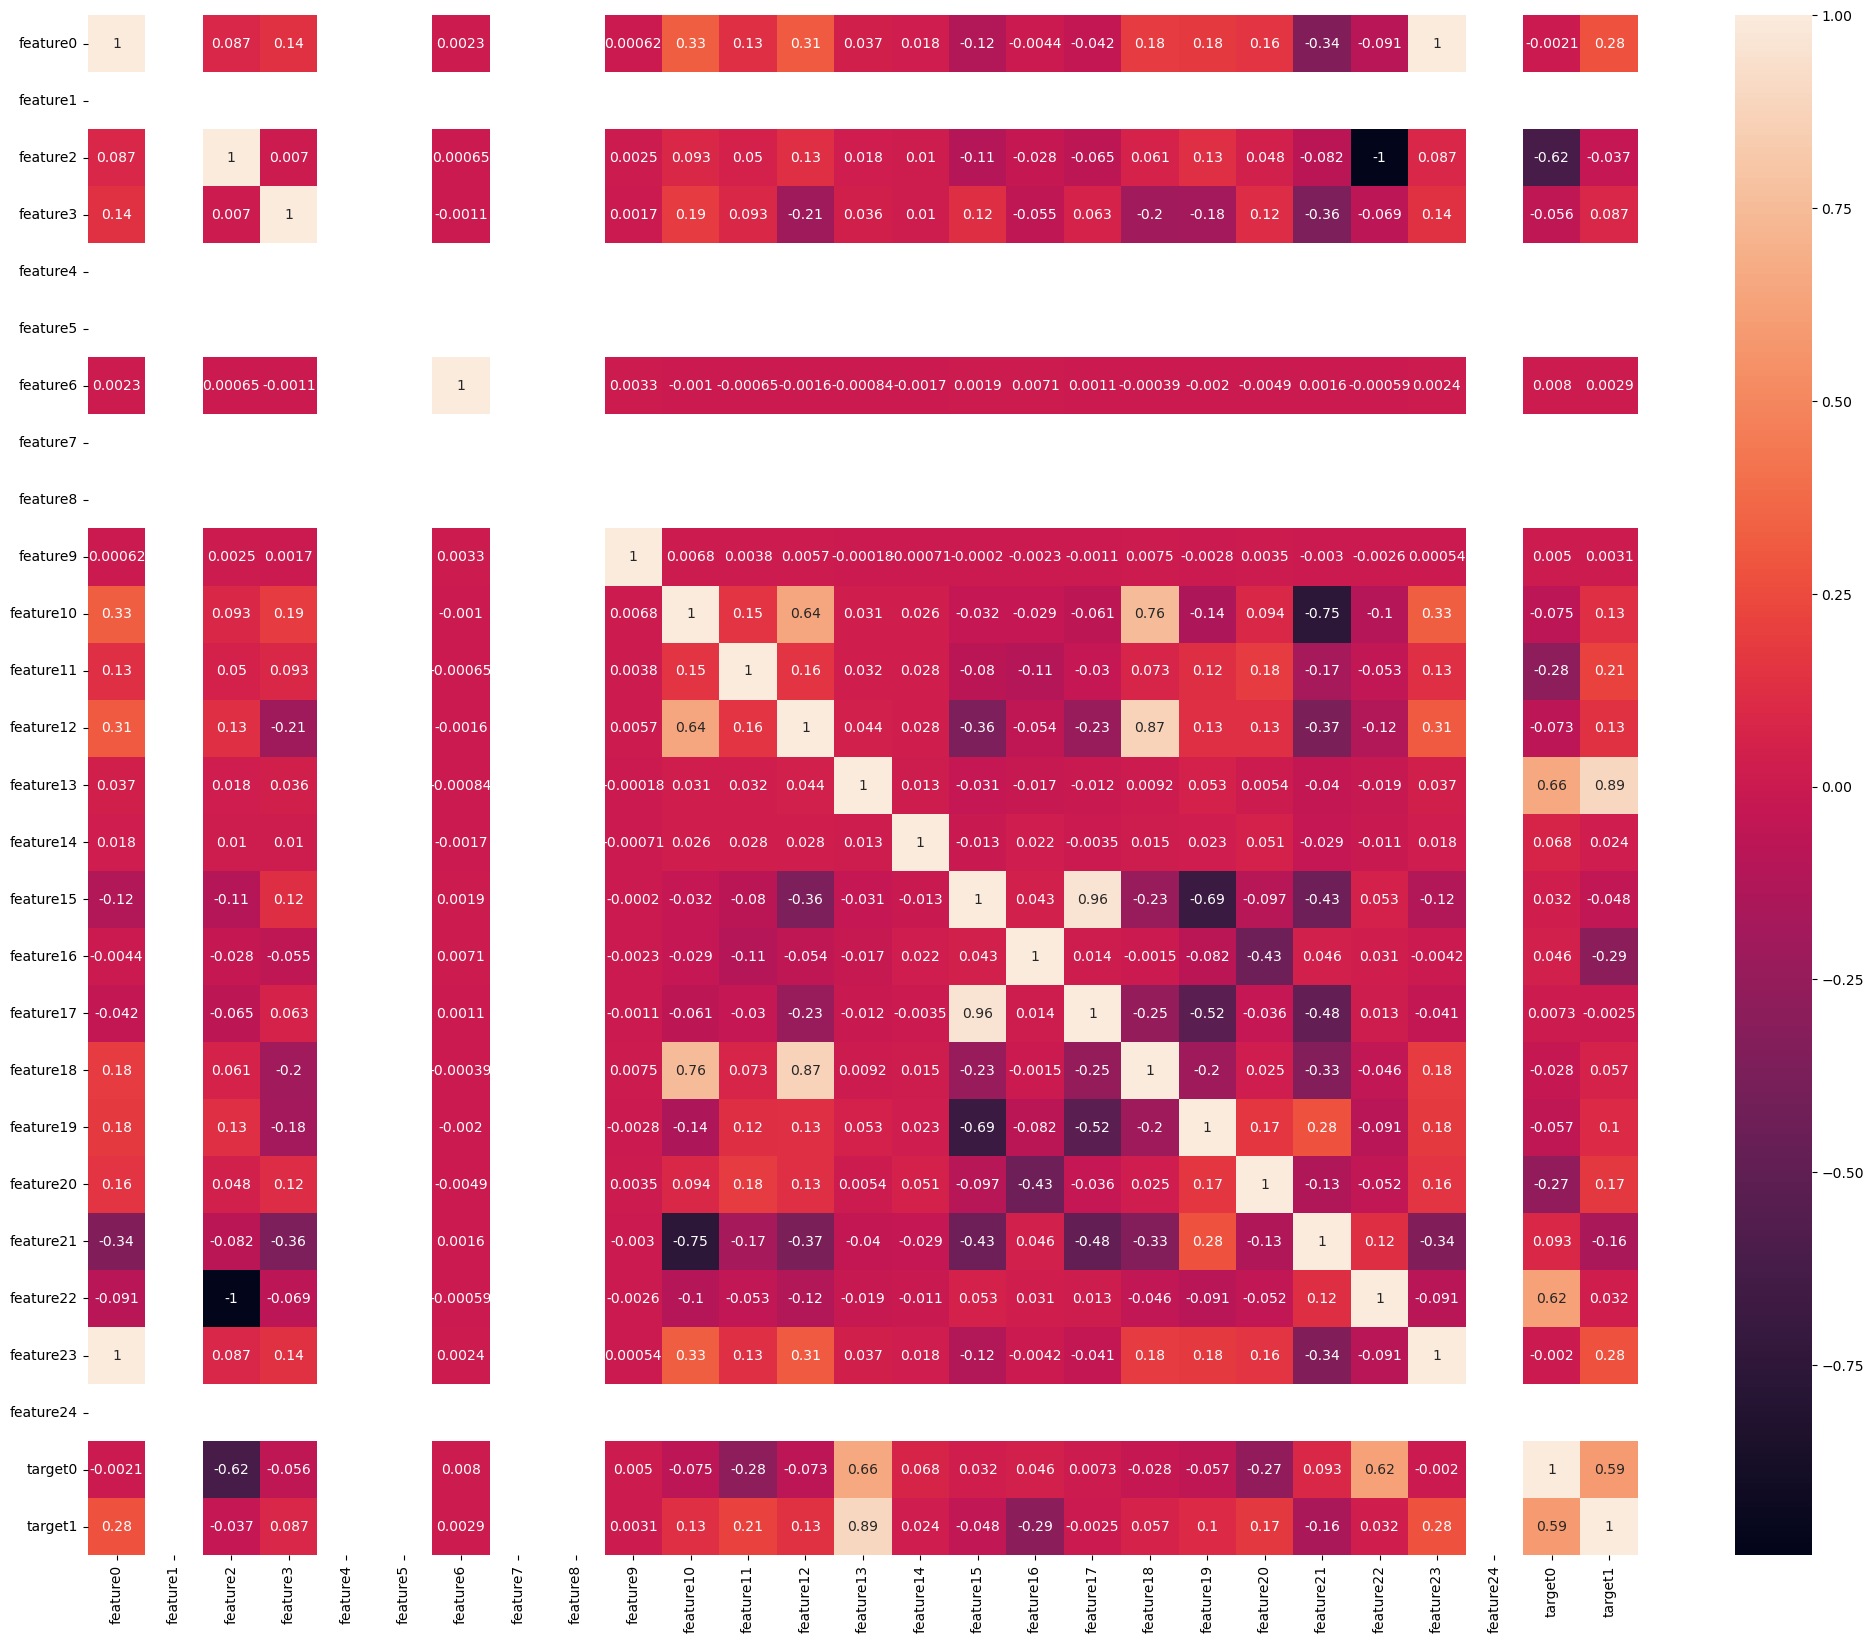

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25, 20))

sns.heatmap(data_gas1.corr(), annot = True)

In [19]:
cols_name = list(data_set.columns)

cols_type_gas1 = pd.DataFrame(
    {
        'Name' : [],
        'Type' : []
    }
)

for col in cols_name:
    if data_gas1.describe()[col].iloc[3] == data_gas1.describe()[col].iloc[7]:
        cols_type_gas1.loc[len(cols_type_gas1.index)] = [col, 'Константа']
    else:
        cols_type_gas1.loc[len(cols_type_gas1.index)] = [col, 'Переменная']
        
display(cols_type_gas1[cols_type_gas1['Type'] == 'Константа'])

,Name,Type
1,feature1,Константа
4,feature4,Константа
5,feature5,Константа
7,feature7,Константа
8,feature8,Константа
24,feature24,Константа


In [20]:
#sns.pairplot(data_gas1)

### Фракция Gas2

In [21]:
data_gas2 = data_set[data_set['feature4'] == 2]

display(data_gas2.head(10))

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
1,41.263782,22.419445,47.945514,-25.847472,2,21.461239,3.474080,49.659980,-13.553188,-13.047593,-12.445940,16.657368,42.453280,99.792375,127.159321,-13.180244,50.722470,-14.451904,-0.906120,105.724742,-9.435222,-16.06015,37.286110,61.224272,39.822424,84.127890,76.578716
4,4.223732,38.772534,48.015553,-25.843943,2,24.635721,12.011581,51.030938,84.244199,-17.735680,40.395582,16.557978,65.988300,91.081310,150.949700,-13.172169,51.012294,-14.439953,8.262354,90.187207,-2.901661,-16.06015,37.398779,40.488468,128.295838,71.128092,50.475082
6,11.721702,30.595148,47.980250,-25.845699,2,23.058197,6.343821,50.337930,35.109451,-30.110980,14.129588,25.656884,54.229090,82.334942,151.964601,-13.176219,94.405315,-14.445897,3.688716,97.723259,-16.417433,-16.06015,37.342954,45.680512,84.152885,78.804629,39.933386
7,2.605159,22.399021,47.945481,-25.847472,2,21.461888,20.437754,49.661049,-13.828137,-20.220093,-12.596952,25.641346,42.428814,99.803719,114.567401,-13.180255,50.675931,-14.451909,-0.906279,106.114331,-3.253380,-16.06015,37.286322,40.402591,39.938368,85.052478,78.324312
8,23.266342,34.712122,47.997834,-25.844826,2,23.835484,14.891136,50.694385,60.412821,-27.669012,27.561911,-1.820373,59.973738,82.498054,164.892483,-13.174224,115.611996,-14.442828,5.974951,93.993050,-22.724551,-16.06015,37.371039,50.869702,105.794001,79.593200,34.202659
10,12.132611,38.732274,48.015391,-25.843951,2,24.603186,31.935894,51.027649,85.522527,-20.192638,40.292134,7.414446,65.948273,93.467978,128.314804,-13.172141,72.442597,-14.439808,8.220442,89.353465,-22.667749,-16.06015,37.399647,45.602565,127.191256,76.543952,44.280757
11,41.763902,38.701353,48.015752,-25.843998,2,24.652592,-7.856149,51.030129,84.567590,-42.153099,40.219383,25.803589,65.976433,86.072680,153.184242,-13.172216,73.090332,-14.439782,8.277937,89.565339,-16.296467,-16.06015,37.398279,61.244819,127.644373,70.750560,41.775362
12,-5.908419,42.790690,48.032500,-25.843104,2,25.437974,40.523428,51.371461,110.244892,-30.165780,53.354586,25.418280,71.894588,92.797351,140.979550,-13.170118,50.818798,-14.436850,10.630787,85.742757,-22.762179,-16.06015,37.428346,35.351649,148.792559,72.515141,41.949108
15,20.847202,30.642219,47.979937,-25.845724,2,23.030449,20.571741,50.346324,35.553996,-27.759965,14.399752,7.462147,54.250343,89.250885,115.080487,-13.176213,72.606293,-14.445875,3.640654,97.837371,-22.809903,-16.06015,37.342517,50.782241,83.832901,82.142348,46.748904
17,-6.157826,22.377633,47.945471,-25.847473,2,21.453125,17.625304,49.660520,-13.750065,-37.230520,-12.554167,7.376289,42.402044,85.844034,149.974513,-13.180244,73.002486,-14.451925,-0.873831,106.095420,-9.570211,-16.06015,37.286232,35.286074,39.978751,86.561167,51.994382


In [22]:
data_gas2.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
count,63850.000000,63850.000000,63850.000000,63850.000000,63850.0,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000,6.385000e+04,63850.000000,63850.000000,63850.000000,63850.000000,63850.000000
mean,17.424049,33.648175,48.015466,-25.843055,2.0,26.282938,14.723168,51.416708,38.081443,-26.412312,23.070657,11.865182,57.849835,88.103191,138.737799,-13.169654,81.035924,-14.438552,6.295861,95.338030,-14.169286,-1.606015e+01,37.395736,48.449784,86.147679,77.622935,46.732662
std,16.056350,9.544747,0.112785,0.008902,0.0,11.206014,11.997650,3.618586,48.705898,8.926975,22.636941,11.648006,11.321172,7.035496,17.481209,0.022186,27.532308,0.024216,7.916955,6.810283,7.511997,1.466927e-11,0.168057,8.877443,43.407924,6.149598,8.901642
min,-7.940096,17.377463,47.924084,-25.848544,2.0,20.489366,-10.853477,49.250805,-44.124381,-46.961253,-12.663198,-10.995420,35.211009,72.801839,112.657331,-13.182703,28.937227,-14.455581,-3.689882,83.882995,-23.105101,-1.606015e+01,37.251959,35.189355,12.887802,57.371242,24.737793
25%,3.129309,26.474914,47.962948,-25.846593,2.0,22.254673,6.277245,50.005803,-13.590338,-32.510915,0.875619,-1.747326,48.316548,82.120001,126.018860,-13.178220,51.215302,-14.448893,1.404372,89.600391,-22.764396,-1.606015e+01,37.314628,40.467749,40.098102,72.790259,40.124803
50%,20.406147,34.508032,47.997545,-25.844854,2.0,23.827992,14.826008,50.682619,35.695650,-27.415977,27.311354,7.469467,59.597176,88.391566,139.286050,-13.174226,73.240393,-14.442932,5.926501,93.973150,-16.130113,-1.606015e+01,37.370452,50.744752,84.018368,77.209478,45.849932
75%,31.089793,38.772096,48.015729,-25.843936,2.0,24.659011,23.443369,51.039536,84.642632,-20.256955,40.933768,25.390632,66.041261,93.861231,152.224918,-13.172116,95.211589,-14.439788,8.303540,101.783889,-9.677537,-1.606015e+01,37.399826,56.012981,127.636186,82.342666,52.459716
max,105.054294,156.508683,49.338369,-25.738734,2.0,180.757188,68.935366,102.445952,111.188391,13.394736,69.616133,85.155045,127.055939,102.653702,166.631497,-12.876318,161.556774,-14.135680,108.176225,106.976426,10.271520,-1.606015e+01,39.548020,95.955691,151.295656,95.184692,81.840792


<Axes: >

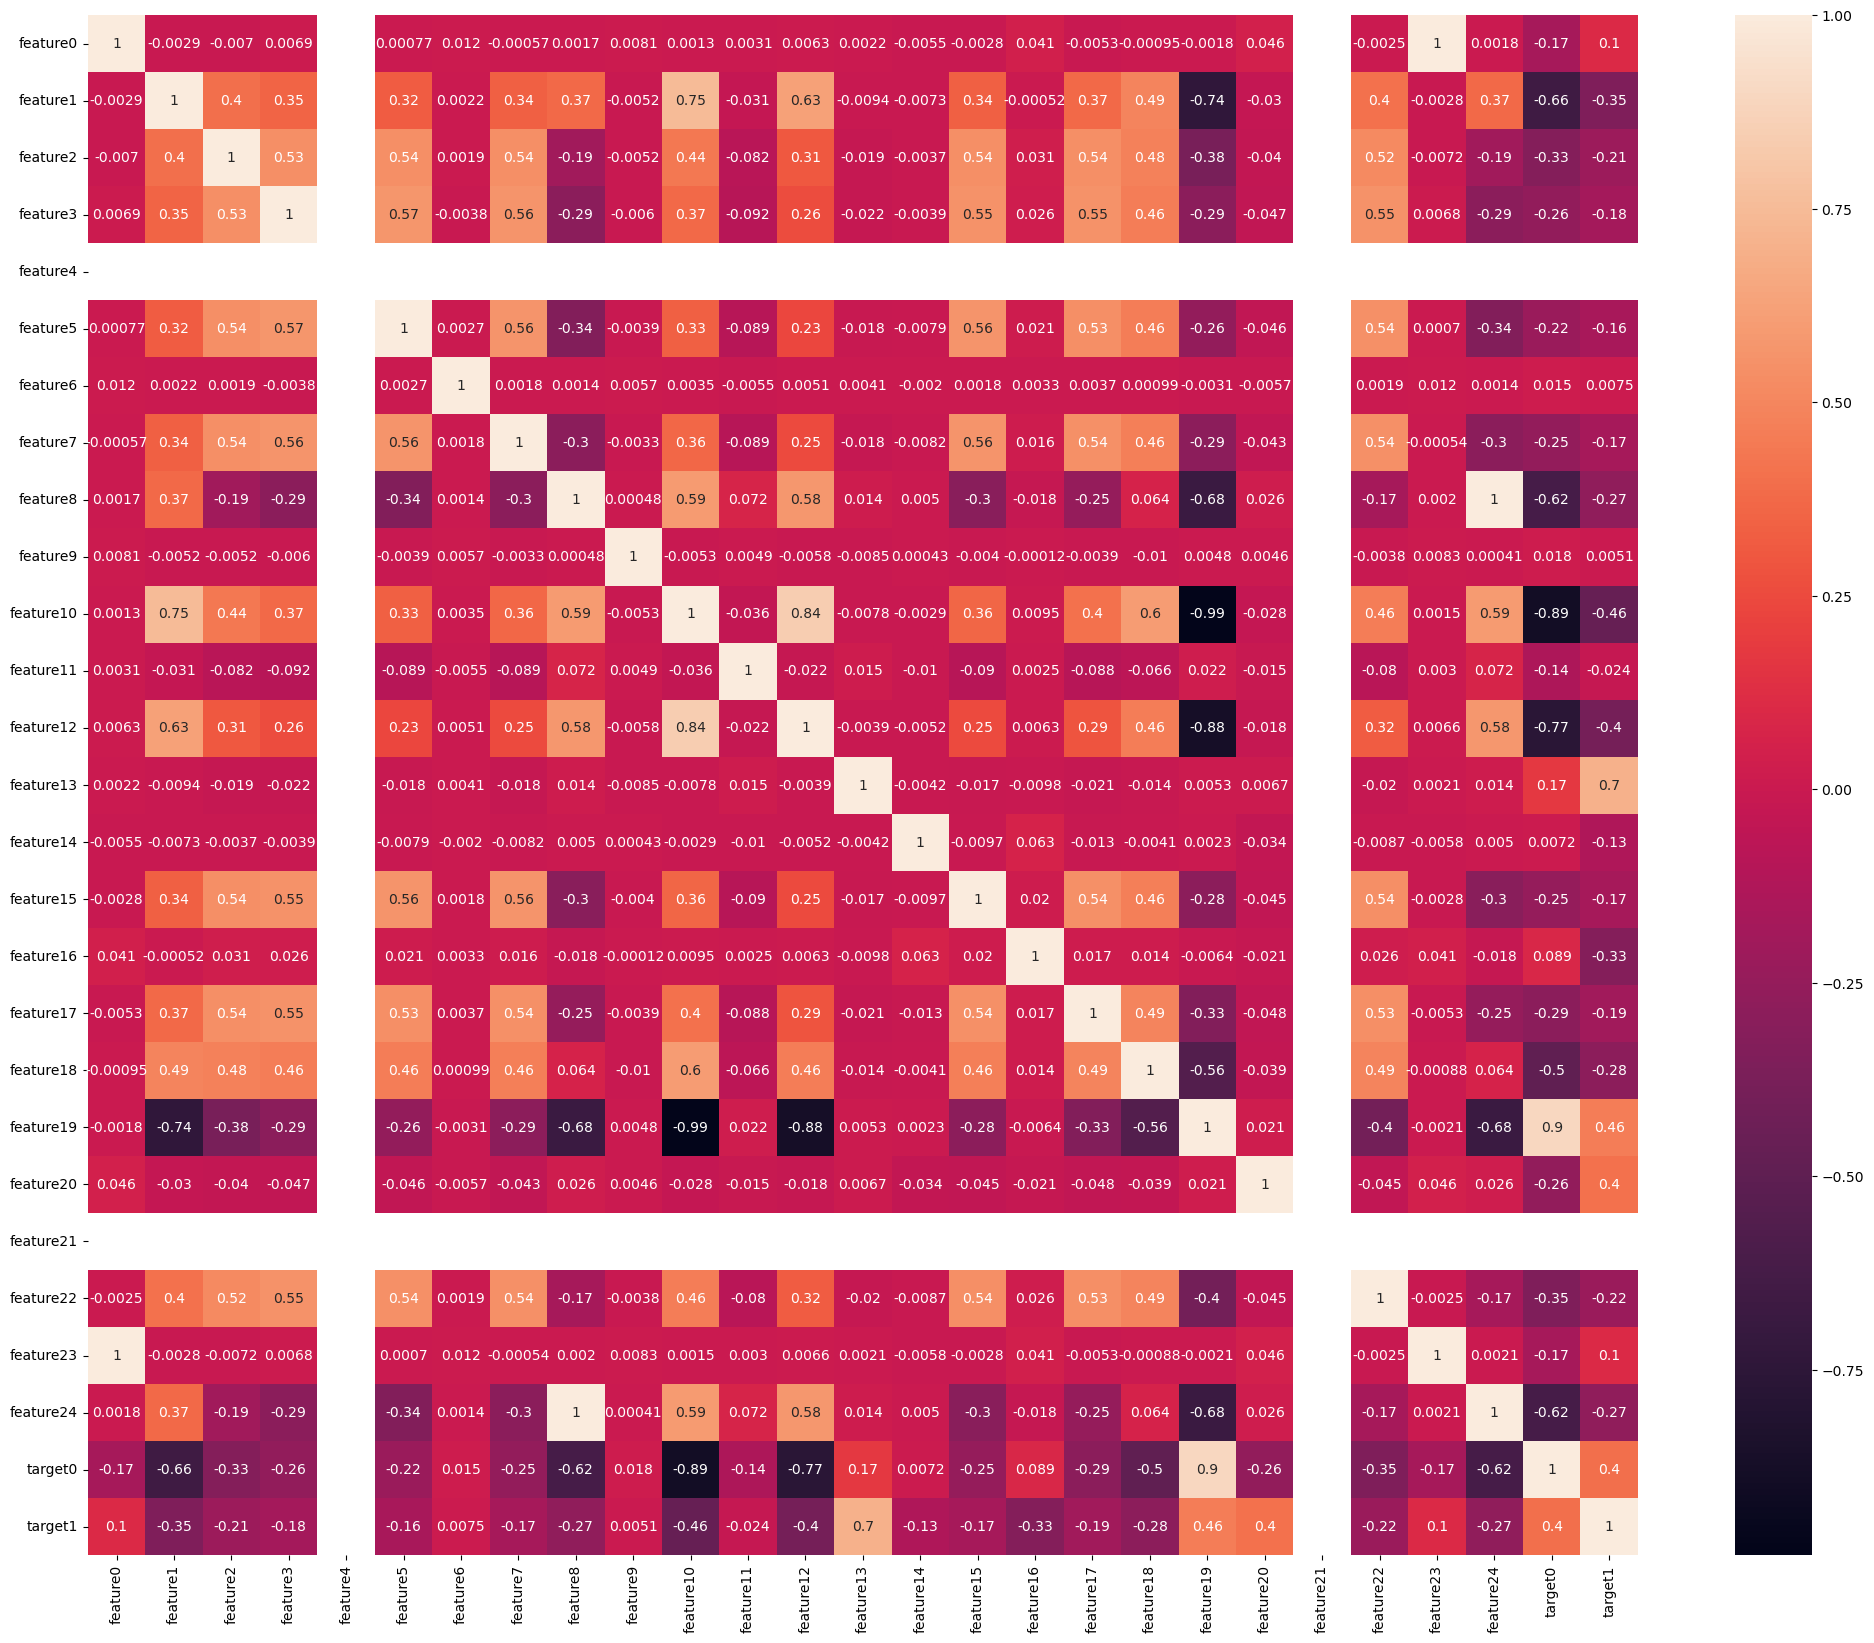

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25, 20))

sns.heatmap(data_gas2.corr(), annot = True)

In [24]:
cols_type_gas2 = pd.DataFrame(
    {
        'Name' : [],
        'Type' : []
    }
)

for col in cols_name:
    if data_gas2.describe()[col].iloc[3] == data_gas2.describe()[col].iloc[7]:
        cols_type_gas2.loc[len(cols_type_gas2.index)] = [col, 'Константа']
    else:
        cols_type_gas2.loc[len(cols_type_gas2.index)] = [col, 'Переменная']
        
display(cols_type_gas2[cols_type_gas2['Type'] == 'Константа'])

,Name,Type
4,feature4,Константа
21,feature21,Константа


In [25]:
#sns.pairplot(data_gas2)

### Соотношение входных фракций Gas1 и Gas2

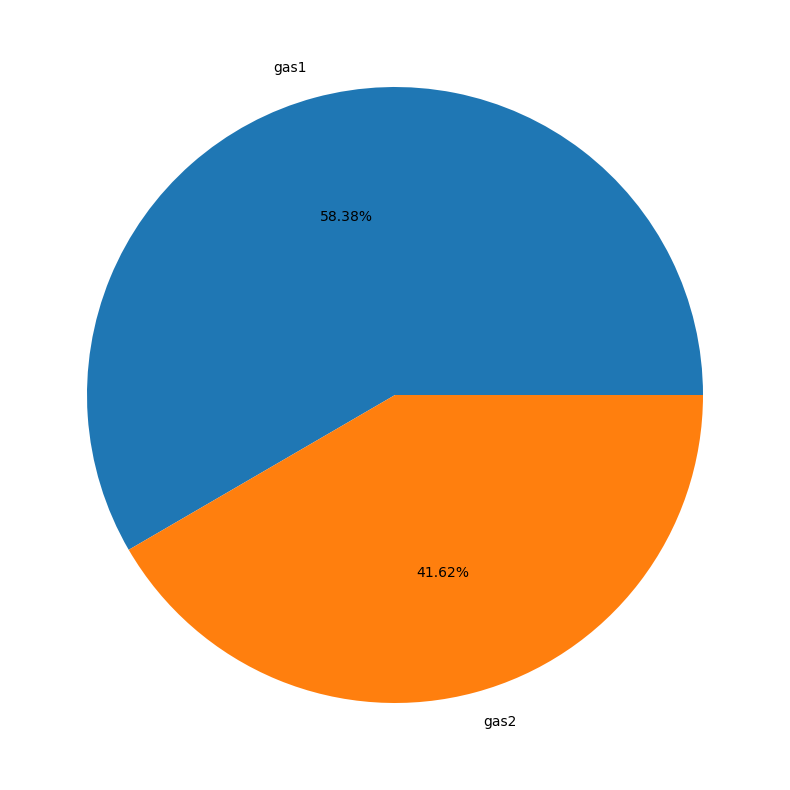

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))

axes.pie(
    data_set['feature4'].value_counts(),
    labels = data['feature4'].value_counts().index,
    autopct = '%.2f%%'
);

### Распределение параметров

In [29]:
def hist_params(columns, type_gas):
    if type_gas == 'gas1+gas2':
        data_set[columns].plot(
        kind = 'hist',
        figsize = (15, 9),
        grid = True,
        color = 'green',
        bins = 30,
        title = f'{columns} (Gas1 и Gas2)'
        )

    elif type_gas == 'gas1':
        data_gas1[columns].plot(
        kind = 'hist',
        figsize = (15, 9),
        grid = True,
        color = 'red',
        bins = 30,
        title = f'{columns} (Gas1)'
        )
    
    else:
        data_gas2[columns].plot(
        kind = 'hist',
        figsize = (15, 9),
        grid = True,
        color = 'blue',
        bins = 30,
        title = f'{columns} (Gas1 и Gas2)'
        )


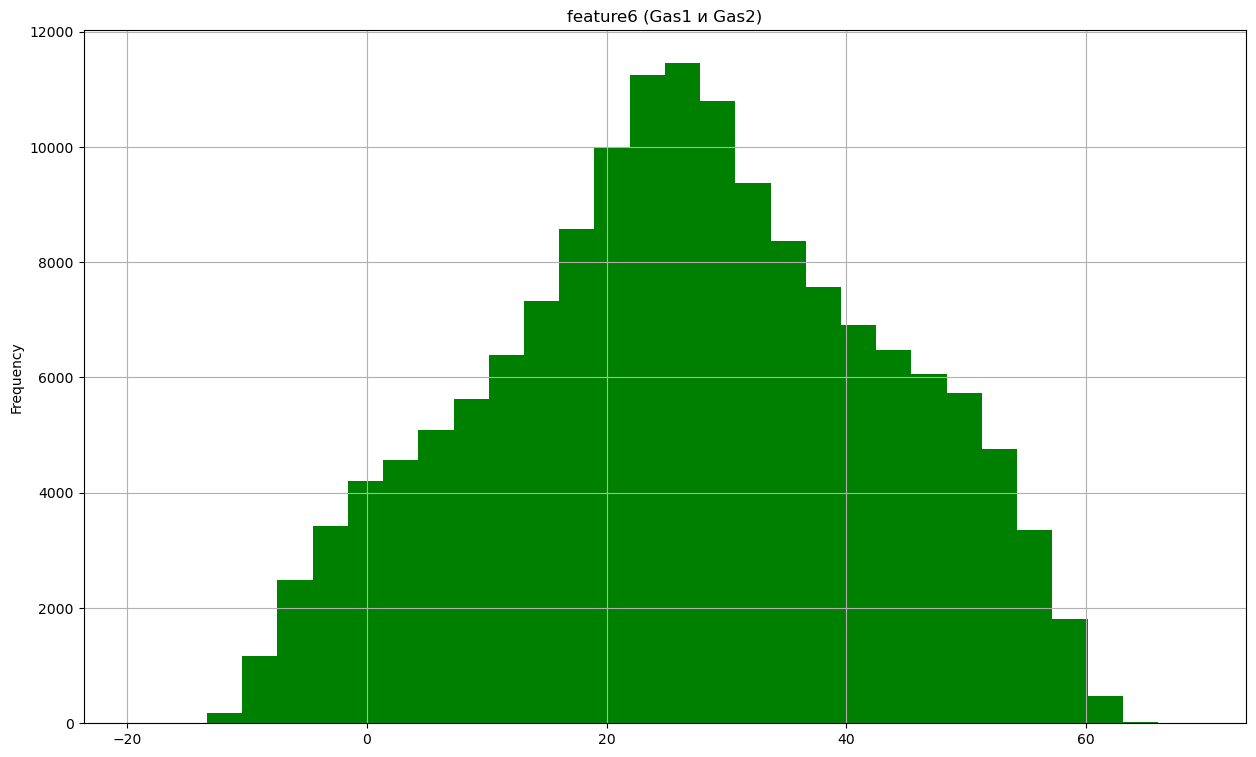

In [30]:
hist_params('feature6', 'gas1+gas2')

### Кросс-плот параметров

In [31]:
def scatter_plot(x, y, type_gas):
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10))

    if type_gas == 'gas1+gas2':
        sns.scatterplot(
            data = data_set,
            x = x,
            y = y
        )
        display(data_set[[x, y]].corr())

    elif type_gas == 'gas1':
        sns.scatterplot(
            data = data_gas1,
            x = x,
            y = y
        )
        display(data_gas1[[x, y]].corr())

    else:
        sns.scatterplot(
            data = data_gas2,
            x = x, 
            y = y
        )
        display(data_gas2[[x, y]].corr())

,target0,target1
target0,1.000000,0.587005
target1,0.587005,1.000000


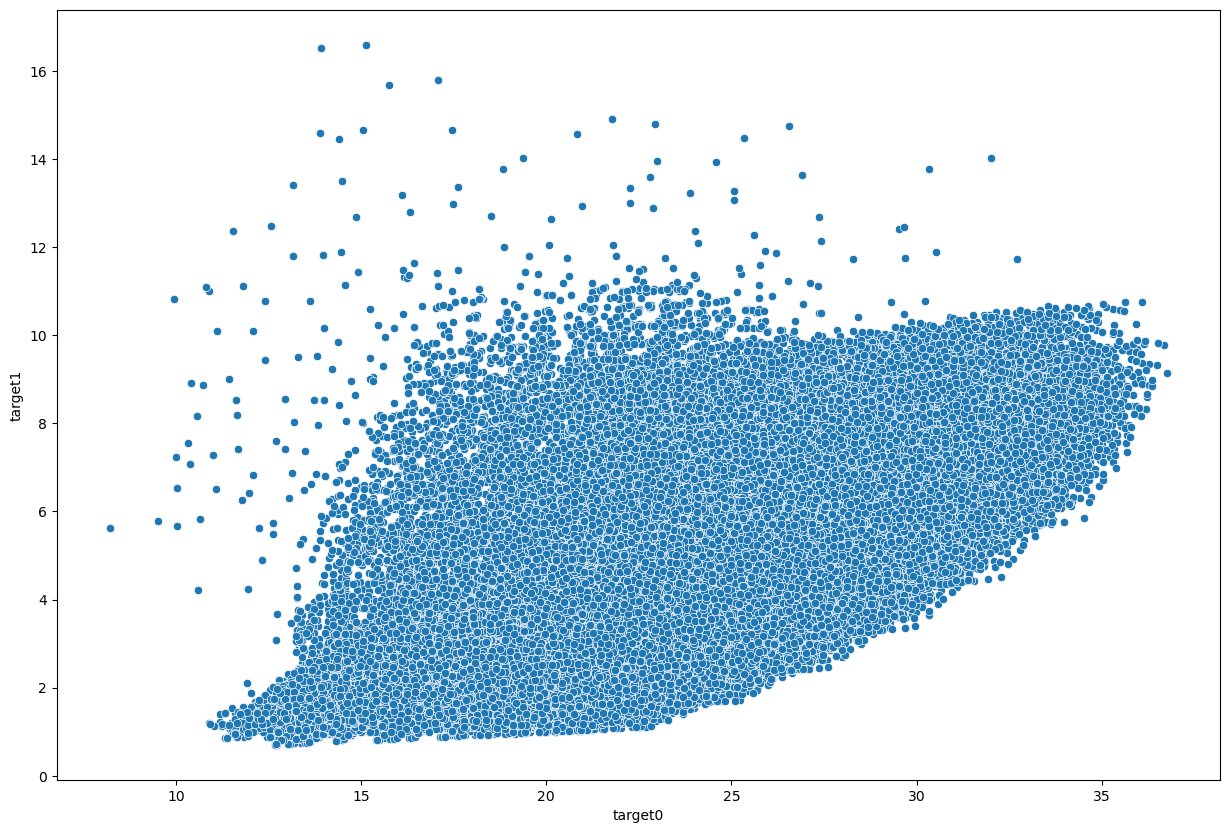

In [32]:
scatter_plot('target0', 'target1', 'gas1')